# Titanic Project: EDA and Machine Learning

![Titanic](https://i.pinimg.com/736x/14/c3/88/14c3887e3825b1259470861916f6e003.jpg)

## Introduction

In this project,I explored the famous Titanic dataset from [Kaggle](https://www.kaggle.com/datasets/dwiuzila/titanic-machine-learning-from-disaster/download?datasetVersionNumber=2) which contains information about passengers on the ill-fated Titanic, including whether they survived or not.    
The primary objective was to construct a predictive model capable of determining passenger survival outcomes based on a variety of features.

The project followed these steps:

- **Step 1: Collect Data**
To commence, I imported essential libraries and acquired the dataset. For this project, I utilized Python libraries like pandas, numpy, matplotlib, seaborn, and scikit-learn. There were two datasets available: titanic_train.csv and titanic_test.csv.

- **Step 2: Exploratory Data Analysis (EDA)**
Before delving into model development, I conducted an exploratory data analysis (EDA) to gain insights from the data. Various plots and visualizations were generated to explore relationships between variables, such as survival rate, gender, class, age distribution, and more.

- **Step 3:** Data Preprocessing
In this phase, I preprocessed the data by addressing missing values and encoding categorical variables. Techniques such as imputing missing values with means or modes and transforming categorical variables into numerical representations were applied.

- **Step 4: Model Training and Testing**
Next, the focus shifted to building machine learning models. I split the data into training and testing sets, performed feature scaling, and trained multiple classifiers. The models considered for this project included Decision Trees, Random Forests, K-Nearest Neighbors (KNN), Support Vector Machines (SVC), Logistic Regression, and Gradient Boosting. Hyperparameter tuning was carried out using randomized search to select the best-performing model. Finally, I made predictions on the test dataset and saved the results in a CSV file.

This project successfully predicted the survival of Titanic passengers.

## STEP 1: Collect Data
######  Import libraries needed, read and understand your data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
test['type']='test'
train['type']= 'train'
df=pd.concat([train,test])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [9]:
df.shape

(1309, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  type         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


# STEP 2: Exploratory Data Analysis
######  creating different plots to check relationship between variables

<AxesSubplot:xlabel='Survived', ylabel='count'>

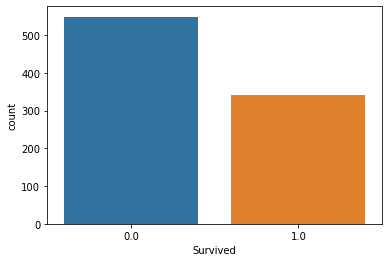

In [11]:
sns.countplot(x='Survived', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

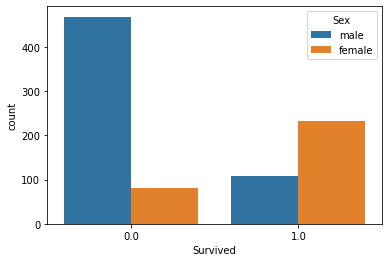

In [12]:
sns.countplot(x='Survived', hue='Sex', data=df)

###### Higher number of passengers did not survive, out of which majority are males. Female tends to survive more than male

<AxesSubplot:xlabel='Survived', ylabel='count'>

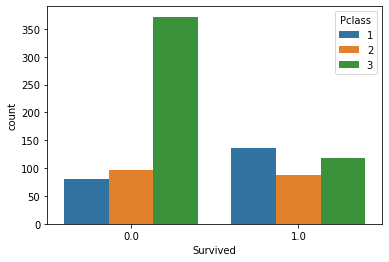

In [13]:
sns.countplot(x='Survived', hue='Pclass', data= df)

###### Majority of the passengers who did not survive are from the 3rd class. Thd highest number of those that survived are from the 1st class

<AxesSubplot:ylabel='Frequency'>

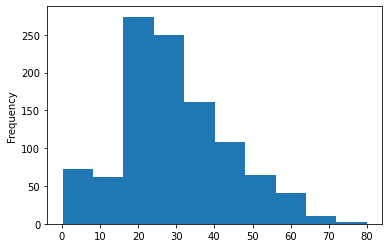

In [14]:
df['Age'].plot.hist()

###### There are more of young passengers on board

<AxesSubplot:xlabel='SibSp', ylabel='count'>

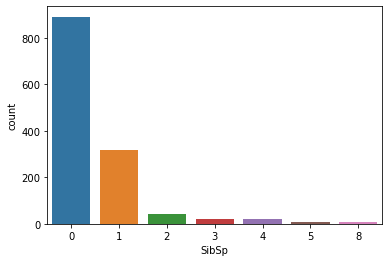

In [15]:
sns.countplot(x='SibSp', data=df)

###### majority of passengers had neither siblings nor spouse on board

<AxesSubplot:xlabel='Parch', ylabel='count'>

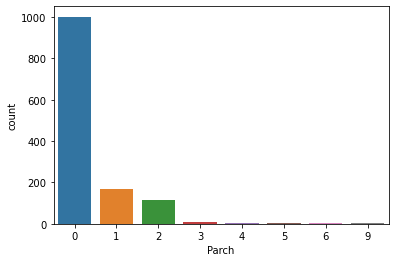

In [16]:
sns.countplot(x='Parch', data=df)

###### majority of passengers had neither parents nor children on board

# STEP 3: Data Wrangling
###### Clean the data by removing the Nan values and unnecessary columns in the data set

In [17]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
type              0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

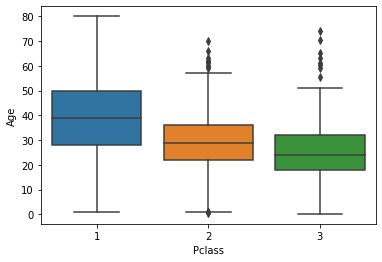

In [18]:
sns.boxplot(x='Pclass',y='Age',data=df)

### Handling Missing Values
Fill the missing values with either the Mean, Median or Mode

In [19]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [20]:
df['Fare']= df['Fare'].fillna(df['Fare'].mean())

In [21]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [22]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df= df.drop('Cabin', axis=1)

In [24]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
type             0
dtype: int64

# Encoding

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  type         1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


In [26]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first = True)

In [27]:
mapping = {'C': 0, 'S': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(mapping)

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Pclass'] = encoder.fit_transform(df['Pclass'])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,type
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,train
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,train
2,3,1.0,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,train
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,train
4,5,0.0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,train


In [30]:
df.drop(['Name','Ticket'], axis=1, inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,type
0,1,0.0,2,1,22.0,1,0,7.2500,1,train
1,2,1.0,0,0,38.0,1,0,71.2833,0,train
2,3,1.0,2,0,26.0,0,0,7.9250,1,train
3,4,1.0,0,0,35.0,1,0,53.1000,1,train
4,5,0.0,2,1,35.0,0,0,8.0500,1,train


In [32]:
train=df[df['type']== 'train']
test=df[df['type']=='test']
train=train.drop('type', axis=1)
test=test.drop('type', axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,2,1,22.0,1,0,7.2500,1
1,2,1.0,0,0,38.0,1,0,71.2833,0
2,3,1.0,2,0,26.0,0,0,7.9250,1
3,4,1.0,0,0,35.0,1,0,53.1000,1
4,5,0.0,2,1,35.0,0,0,8.0500,1


In [34]:
train.drop('PassengerId', axis=1, inplace=True)

In [35]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,2,1,34.5,0,0,7.8292,2
1,893,NaN,2,0,47.0,1,0,7.0000,1
2,894,NaN,1,1,62.0,0,0,9.6875,2
3,895,NaN,2,1,27.0,0,0,8.6625,1
4,896,NaN,2,0,22.0,1,1,12.2875,1


In [36]:
PassengerId=test['PassengerId']

In [37]:
test.drop(['Survived','PassengerId'],axis=1,inplace=True)

In [38]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,2
1,2,0,47.0,1,0,7.0000,1
2,1,1,62.0,0,0,9.6875,2
3,2,1,27.0,0,0,8.6625,1
4,2,0,22.0,1,1,12.2875,1


# Step 4: Train and Testing Your Data
###### Build the model on the train data and predict your model on the test data

In [39]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [40]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2, random_state=5) 

# Feature Scaling
###### using standard scaler

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))

    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [44]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.803
Test score: 0.827


DecisionTreeClassifier(criterion='entropy', max_features=0.85,
                       max_leaf_nodes=30, min_impurity_decrease=0.005,
                       min_samples_split=10, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [45]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy', max_features=0.85,
                       max_leaf_nodes=30, min_impurity_decrease=0.005,
                       min_samples_split=10, min_weight_fraction_leaf=0.0075,
                       random_state=2)
DTC.fit(x_train_sc, y_train)
DTC_pred= DTC.predict(x_test_sc)
accuracy_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print('The accuracy score of Decision Tree model is:', accuracy_DTC)

The accuracy score of Decision Tree model is: 82.68


In [46]:
from sklearn.ensemble import RandomForestClassifier
def randomized_search(params, runs=20, clf=RandomForestClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search( params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         })

Training score: 0.819
Test score: 0.832


RandomForestClassifier(max_depth=4, max_features=0.7, min_samples_leaf=4,
                       random_state=2)

In [47]:
from sklearn.ensemble import RandomForestClassifier
RFC =RandomForestClassifier(max_depth=4, max_features=0.7, min_samples_leaf=4,
                       random_state=2)
RFC.fit(x_train_sc, y_train)
RFC_pred= RFC.predict(x_test_sc)
accuracy_RFC= round(accuracy_score(RFC_pred, y_test) * 100, 2)
print('The accuracy score of Random forest model is:', accuracy_RFC)

The accuracy score of Random forest model is: 83.24


In [48]:
from sklearn.neighbors import KNeighborsClassifier
def randomized_search(params, runs=20, clf=KNeighborsClassifier()): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search( params=  {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']})
              

Training score: 0.704
Test score: 0.782


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15, weights='distance')

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier(algorithm='kd_tree', n_neighbors=15, weights='distance')
KNN.fit(x_train_sc, y_train)
KNN_pred= KNN.predict(x_test_sc)
accuracy_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 2)
print('The accuracy score of KNeighbors model is:', accuracy_KNN)

The accuracy score of KNeighbors model is: 83.24


In [50]:
from sklearn.svm import SVC 
def randomized_search(params, runs=20, clf=SVC(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params= {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']})

Training score: 0.788
Test score: 0.849


SVC(C=100, gamma=0.001, random_state=2)

In [51]:
from sklearn.svm import SVC
SVC =SVC(C=100, gamma=0.001, random_state=2)
SVC.fit(x_train_sc, y_train)
SVC_pred= SVC.predict(x_test_sc)
accuracy_SVC = round(accuracy_score(SVC_pred, y_test) * 100, 2)
print('The accuracy score for SVC model is:', accuracy_SVC)

The accuracy score for SVC model is: 80.45


In [52]:
from sklearn.linear_model import LogisticRegression
def randomized_search(params, runs=20, clf=LogisticRegression(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search( params=  { 'dual' : [True, False] ,
              'C': [0.1, 1, 10, 100, 1000],
              'tol' : [1, 0.1, 0.01, 0.001, 0.0001] ,
              'fit_intercept' : [True, False], 
              'intercept_scaling': [1] })

Training score: 0.782
Test score: 0.821


LogisticRegression(C=1, random_state=2, tol=1)

In [53]:
from sklearn.linear_model import LogisticRegression
LR_regressor =LogisticRegression(C=1, random_state=2, tol=1)
LR_regressor.fit(x_train_sc, y_train)
LR_pred= LR_regressor.predict(x_test_sc)
accuracy_LR = round(accuracy_score(LR_pred, y_test) * 100, 2)
print('The accuracy score of Logistic Regression model is:', accuracy_LR)

The accuracy score of Logistic Regression model is: 82.12


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
def randomized_search(params, runs=20, clf=GradientBoostingClassifier()): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search( params= {'tol' : [1, 0.1, 0.01, 0.001, 0.0001],
              'learning_rate' : [1, 0.1, 0.01, 0.001, 0.0001] ,
              'criterion' : ['friedman_mse','entropy', 'gini'],
                'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                'max_depth':[None, 2,4,6,8],
                'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training score: 0.819
Test score: 0.849


GradientBoostingClassifier(max_depth=6, max_features=0.9, max_leaf_nodes=40,
                           min_impurity_decrease=0.15, min_samples_leaf=0.03,
                           min_samples_split=8,
                           min_weight_fraction_leaf=0.0025)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =GradientBoostingClassifier(max_depth=2, max_features=0.8, max_leaf_nodes=50,
                           min_samples_split=5, min_weight_fraction_leaf=0.005,
                           tol=0.001)
GBC.fit(x_train_sc, y_train)
GBC_pred= GBC.predict(x_test_sc)
accuracy_GBC = round(accuracy_score(GBC_pred, y_test) * 100, 2)
print('The accuracy score of GradientBoosting model is:', accuracy_GBC)

The accuracy score of GradientBoosting model is: 85.47


#### Comparing the different models

In [56]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVC', 'Logistic Regression', 'Gradient Boosting Classifier'],
    'Score': [accuracy_DTC, accuracy_RFC, accuracy_KNN, accuracy_SVC, accuracy_LR, accuracy_GBC]})
models.sort_values(by = 'Score', ascending=False)

,Model,Score
5,Gradient Boosting Classifier,85.47
1,Random Forest,83.24
2,KNN,83.24
0,Decision Tree,82.68
4,Logistic Regression,82.12
3,SVC,80.45


Gradient Boosting Classifier gave the highest accuracy score

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    uint8  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 23.3 KB


In [58]:
test['Fare']= test['Fare'].fillna(test['Fare'].mean())

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =GradientBoostingClassifier(max_depth=6, max_features=0.9, max_leaf_nodes=40,
                           min_impurity_decrease=0.15, min_samples_leaf=0.03,
                           min_samples_split=8,
                           min_weight_fraction_leaf=0.0025)
GBC.fit(x, y)
predict= GBC.predict(test)

In [64]:
Survived_pred= pd.DataFrame()
Survived_pred['PassengerId']= PassengerId
Survived_pred['Survived'] = predict.astype(int)
Survived_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [61]:
Survived_pred.to_csv('Prediction.csv',index=False)

In [62]:
d=pd.read_csv('Prediction.csv')
d.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [63]:
d['Survived'].value_counts()

0    276
1    142
Name: Survived, dtype: int64